In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt

### latex stuff ###
use_tex = False

if use_tex:
    width = 5.5  # 5.5 for producing plot for report
    height = width/1.5
    fsize = 10  # fontsize, 10 for producing plot for report
    font = {'family': 'Times New Roman', 'size': fsize}
else:
    width = 6
    height = width/1.5
    fsize = 16
    font = {'size': fsize}
    
mpl.rc('font', **font)
mpl.rc('xtick', labelsize=fsize)
mpl.rc('ytick', labelsize=fsize)
mpl.rc('text', usetex=use_tex)

# Problem Set 3
## Learning from data [TIF285], Chalmers, Fall 2019

Last revised: 09-Oct-2019 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions

- See deadline on the course web page
- This problem set is performed individually (but collaboration is encouraged) and contains a number of basic and extra problems; you can choose which and how many to work on.
- See examination rules on the course web page.
- Hand-in is performed through the following **two** actions:
  - Upload of your solution in the form of a jupyter notebook, or python code, via Canvas.
  - Answer the corresponding questions on OpenTA.
  
  Note that the hand-in is not complete, and will not be graded, if any of those actions is not performed.

Fill your personal details
- Name: **Jacobsson, Simon**
- Personnummer: **970417-0456**
  <br/>
  (civic registration number)

## Problems
The 10 basic points of this problem set are distributed over four problems:
1. Assigning probabilities for a hundred-sided die (2 basic points)
2. Chi-squared hypothesis testing (2 basic points)
3. Gaussian process regression (3 basic points)
4. Neural network classification (3 basic points)

Each of them will be presented in a separate jupyter notebook.

## Problem 3: Gaussian process regression
### (3 basic points)

In the following we will perform Gaussian Process regression of the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) ($\mu$) vs. [redshift](https://en.wikipedia.org/wiki/Redshift) ($z$) relation for a simulated set of 100 supernovas.

The data, 
$(z, \mu, \Delta \mu)$,
is generated from an underlying true distribution $p(z) \propto (z/z_0)^2 \exp[(z/z_0)^{1.5}]$ 
with $z_0 = 0.3$. An array with $(z_\mathrm{true}, \mu_\mathrm{true})$ is also available for comparison.

Credit: The data and a part of the problem formulation is obtained from the [AstroML]("http://www.astroml.org/") python module distributed under the 3-clause BSD license. For more information, see http://astroML.github.com.

In [2]:
import GPy

### Task 1
Load the experimental data and the true function data and plot $\mu = \mu(z)$. 

In [3]:
# Load experimental data sample
z_sample, mu_sample, dmu = np.loadtxt('cosmology_sample.dat',unpack=True)

# data must be two-dimensional for GPy
x = z_sample.reshape((-1,1))
y = mu_sample.reshape((-1,1))
print('The experimental data is of shape:', y.shape)

The experimental data is of shape: (100, 1)


In [4]:
# Load true function
z, mu_true = np.loadtxt('cosmology_true.dat',unpack=True)

print('The true function data is of shape:', mu_true.shape)

The true function data is of shape: (1000,)


### Task 2 
Use the GPy python module to create a GP model with an RBF kernel. The GP model will contain a Gaussian noise term by default. 
* Print the hyperparameters of the kernel before doing optimization.
* Use GPy to optimize the model hyperparameters to the available data.
* Print the optimized GP model hyperparameters. Check in particular the Gaussian noise variance. Does it make sense given the uncertainites that were present in the experimental data?
* What is the log likelihood of the data with this GP model? (*Hint*: Use the GPy `model.log_likelihood()` function , where `model` is a GPy regression model)
* Plot the GP regression model together with the data (the GPy plot command will by default show the mean prediction and the 95% credibility region).

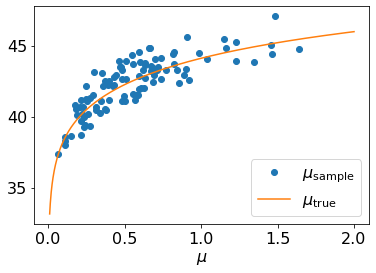

In [76]:
fig, ax = plt.subplots()
ax.plot(z_sample, mu_sample, 'o', label=r'$\mu_\mathrm{sample}$')
ax.plot(z, mu_true, label=r'$\mu_\mathrm{true}$')
ax.set_xlabel(r'$\mu$', fontsize=fsize)

plt.legend(fontsize=fsize)
plt.show()

In [6]:
d = 1          # input dimension
k = GPy.kern.RBF(d)

print(k)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        


In [7]:
m = GPy.models.GPRegression(x, y, k)
m.optimize()

print(m)
print('\n' + f'log(likelihood(data)) = {m.log_likelihood():.2f}')


Name : GP regression
Objective : 152.57170381374402
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.2044402936884  |      +ve      |        
  rbf.lengthscale          |   3.017464600335797  |      +ve      |        
  Gaussian_noise.variance  |  1.0005767169863675  |      +ve      |        

log(likelihood(data)) = -152.57


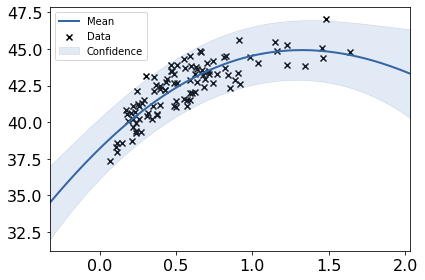

In [8]:
plot = m.plot();

### Task 3
Repeat the GP model optimization, but initialize the hyperparameters with 
* RBF lengthscale = 1.2
* RBF variance = 1000

From this initial guess, use GPy to optimize the model hyperparameters to the available data.
* Print the optimized GP model hyperparameters. 
* What is the log likelihood of the data with this GP model? 
* Plot the GP regression model together with the data.
* What are the main differences of the fit in Task 2 and the one in Task 3?

In [9]:
d = 1          # input dimension
var = 1000       # variance
theta = 1.2    # lengthscale
k = GPy.kern.RBF(d, variance=var, lengthscale=theta)

print(k)

  rbf.         |   value  |  constraints  |  priors
  variance     |  1000.0  |      +ve      |        
  lengthscale  |     1.2  |      +ve      |        


In [10]:
m = GPy.models.GPRegression(x, y, k)
m.optimize()

print(m)
print('\n' + f'log(likelihood(data)) = {m.log_likelihood():.2f}')


Name : GP regression
Objective : 151.91353925117818
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.0000119807421  |      +ve      |        
  rbf.lengthscale          |    1.43623103879689  |      +ve      |        
  Gaussian_noise.variance  |  0.9253990430418901  |      +ve      |        

log(likelihood(data)) = -151.91


 /home/simon/miniconda3/envs/tif285-env/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


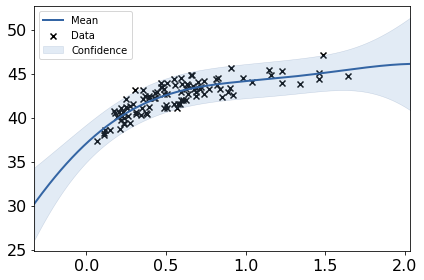

In [11]:
plot = m.plot();

### Task 4
* Create an array `Xp = numpy.linspace(0.0,2.0,50)[:,None]` to be used for predictions.
* Extract the mean vector and the covariance matrix from your GPy model object, `model`, using the command `mu, C = model.predict(Xp,full_cov=True)`
* Draw 20 samples from the multivariate Gaussian defined by `mu, C`.
* Extract the mean vector and the standard deviation vector of the 20 samples.
* Plot the sampled curves in a figure together with the mean and the $1\sigma$ and $2\sigma$ bands. (*Hint*: Use `alpha=0.3` when plotting the sampled curves in order to make them somewhat transparent).
* How does the result from this finite number of samples compare to the model plot that was produced in Task 3?

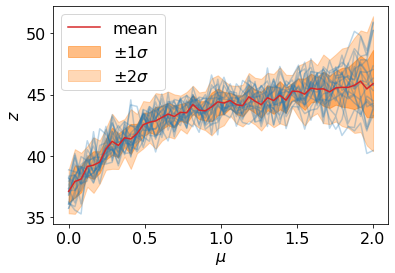

<delta mu> = 6.67


In [78]:
Xp = np.linspace(0.0, 2.0, 50)[:,None]
mu, C = m.predict(Xp, full_cov=True)

samples = np.random.multivariate_normal(mu[:,0], C, size=20)

fig, ax = plt.subplots()
ax.plot(Xp[:,0], samples.T, '-', color='C0', alpha=0.3)

mean = np.mean(samples, axis=0)
std = np.sqrt(np.var(samples, axis=0))
ax.plot(Xp[:,0], mean, '-', color='C3', label=r'mean', zorder=2)
ax.fill_between(Xp[:,0], mean + 1 * std, mean - 1 * std, color='C1', alpha=0.5, label=r'$\pm 1\sigma$', zorder=0)
ax.fill_between(Xp[:,0], mean + 2 * std, mean - 2 * std, color='C1', alpha=0.3, label=r'$\pm 2\sigma$', zorder=0)

ax.set_xlabel(r'$\mu$', fontsize=fsize)
ax.set_ylabel(r'$z$', fontsize=fsize)

plt.legend(fontsize=fsize)
plt.show()

print(f'<delta mu> = {np.mean(mean - mu_true[:50:]):.2f}')